In [55]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/star-dataset/6 class csv.csv


In [56]:
# Importing the Data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [57]:
df = pd.read_csv('/kaggle/input/star-dataset/6 class csv.csv')

In [58]:
df.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M


# Reading the dataset

In [59]:
df.describe()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type
count,240.000000,240.000000,240.000000,240.000000,240.000000
mean,10497.462500,107188.361635,237.157781,4.382396,2.500000
std,9552.425037,179432.244940,517.155763,10.532512,1.711394
min,1939.000000,0.000080,0.008400,-11.920000,0.000000
25%,3344.250000,0.000865,0.102750,-6.232500,1.000000
50%,5776.000000,0.070500,0.762500,8.313000,2.500000
75%,15055.500000,198050.000000,42.750000,13.697500,4.000000
max,40000.000000,849420.000000,1948.500000,20.060000,5.000000


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature (K)         240 non-null    int64  
 1   Luminosity(L/Lo)        240 non-null    float64
 2   Radius(R/Ro)            240 non-null    float64
 3   Absolute magnitude(Mv)  240 non-null    float64
 4   Star type               240 non-null    int64  
 5   Star color              240 non-null    object 
 6   Spectral Class          240 non-null    object 
dtypes: float64(3), int64(2), object(2)
memory usage: 13.2+ KB


<AxesSubplot:>

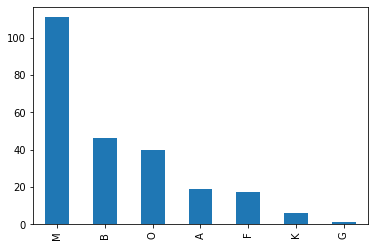

In [61]:
df['Spectral Class'].value_counts().plot.bar()

In [62]:
by_class = df.groupby(by='Spectral Class')

## This groups each star given it's color so we can view the average values given each class.

In [63]:
by_class.mean()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type
Spectral Class,,,,,
A,9842.368421,49860.247538,135.878422,4.085211,2.842105
B,19574.478261,78179.393322,202.022292,3.722609,2.826087
F,8516.823529,1.383960,0.551334,8.611765,2.470588
G,6850.000000,229000.000000,1467.000000,-10.070000,5.000000
K,4499.500000,152000.204167,475.444333,0.267333,3.666667
M,3257.333333,61423.425621,273.894832,8.367829,1.675676
O,22294.075000,330564.625000,257.794675,-6.596175,4.025000


In [64]:
by_class.std()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type
Spectral Class,,,,,
A,1913.681972,150119.273329,402.142640,8.753602,0.898342
B,6195.248192,182294.647307,493.825127,8.764962,1.081241
F,3041.498423,2.773895,0.632965,5.344170,0.514496
G,NaN,NaN,NaN,NaN,NaN
K,461.549889,259922.922267,738.390214,8.243908,1.032796
M,352.000293,111566.411903,551.585254,11.106946,1.959416
O,10589.893001,198396.268958,521.810621,1.514559,0.530481


# Data visualization

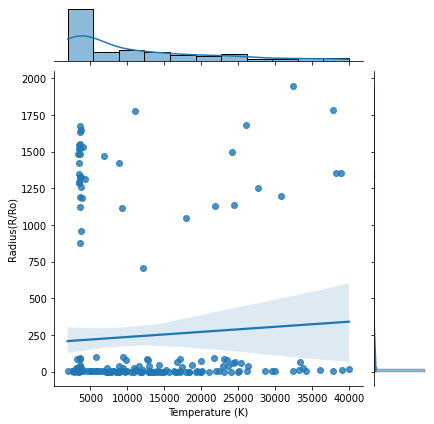

In [65]:
sns.jointplot(x='Temperature (K)', y='Radius(R/Ro)', data=df, kind='reg')

## This jointplot shows how warmer stars tend to be larger in size compared to cooler stars.

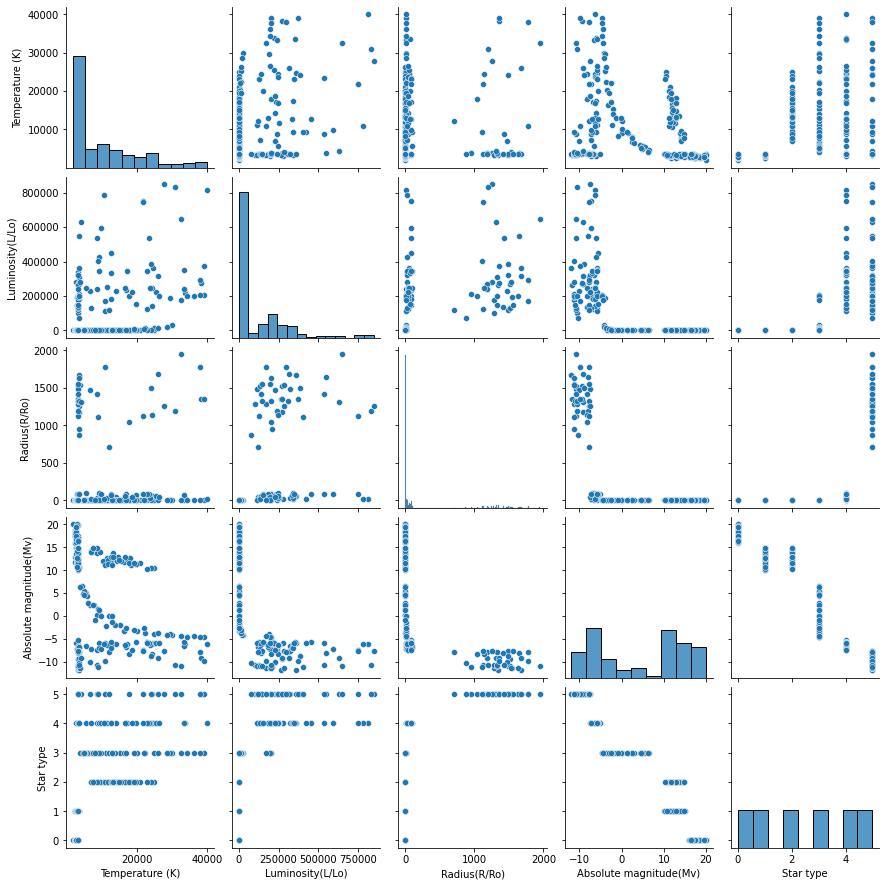

In [66]:
sns.pairplot(df)

## This pairplot shows a direct relationship to the size of the star compared to its absolute magnitude. The larger stars tend to have a lower absolute magnitude as well as a higher temperature.

# Implementing a K-Nearest Neighbors and Random Forest Classifer model

## First, we need to scale the data to remove any large data value that can mess up the models predictions.

In [67]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df.drop(['Spectral Class', 'Star color'], axis=1))

StandardScaler()

In [68]:
scaled_features = scaler.transform(df.drop(['Spectral Class', 'Star color'], axis=1))

In [69]:
df_features = pd.DataFrame(scaled_features, columns = df.columns[:-2])
df_features.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type
0,-0.779382,-0.598624,-0.459210,1.116745,-1.46385
1,-0.782110,-0.598624,-0.459241,1.162414,-1.46385
2,-0.828477,-0.598624,-0.459342,1.362213,-1.46385
3,-0.807496,-0.598624,-0.459229,1.167171,-1.46385
4,-0.897819,-0.598624,-0.459340,1.491607,-1.46385


In [70]:
from sklearn.model_selection import train_test_split

In [71]:
X = df_features
y = df['Spectral Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## First, we'll use the K nearest neighbors model

In [72]:
from sklearn.neighbors import KNeighborsClassifier

## In order to choose the neighor value with the lowest error rate, we'll run test values ranging from n=1-40 and graph the results.

In [73]:
error_rate = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

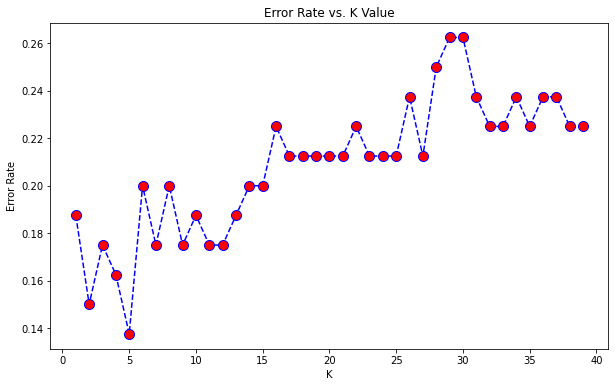

In [74]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

## 5 has the lowest error rate, so we'll use that value for the number of neighbors.


In [75]:
from sklearn.metrics import classification_report, confusion_matrix

In [76]:
knn = KNeighborsClassifier(n_neighbors= 5)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)

print('WHEN N = 5')
print(classification_report(y_test, pred))
print(confusion_matrix(y_test, pred))

WHEN N = 5
              precision    recall  f1-score   support

           A       0.75      0.75      0.75         4
           B       0.86      0.80      0.83        15
           F       0.50      0.50      0.50         4
           K       0.00      0.00      0.00         3
           M       0.91      1.00      0.95        39
           O       0.87      0.87      0.87        15

    accuracy                           0.86        80
   macro avg       0.65      0.65      0.65        80
weighted avg       0.83      0.86      0.84        80

[[ 3  0  0  0  1  0]
 [ 0 12  0  0  1  2]
 [ 1  1  2  0  0  0]
 [ 0  0  2  0  1  0]
 [ 0  0  0  0 39  0]
 [ 0  1  0  0  1 13]]


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Using KNN, we find that the macro average of correct predictions is 65%, but the weighted average is 83%, we can make it better using Random Forest Classifier

In [77]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 100)
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [78]:
rfc_predictions = rfc.predict(X_test)

In [79]:
print(classification_report(y_test, rfc_predictions))
print('\n')
print(confusion_matrix(y_test, rfc_predictions))

              precision    recall  f1-score   support

           A       0.67      0.50      0.57         4
           B       0.81      0.87      0.84        15
           F       0.40      0.50      0.44         4
           K       0.00      0.00      0.00         3
           M       1.00      1.00      1.00        39
           O       0.82      0.93      0.87        15

    accuracy                           0.88        80
   macro avg       0.62      0.63      0.62        80
weighted avg       0.85      0.88      0.86        80



[[ 2  1  0  0  0  1]
 [ 0 13  1  0  0  1]
 [ 1  1  2  0  0  0]
 [ 0  0  2  0  0  1]
 [ 0  0  0  0 39  0]
 [ 0  1  0  0  0 14]]


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Using the Random Forest Classifer model, we get a slightly higher weighted average, but with a much lower macro average.